## Problem Statement 
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
- Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  a-Which variables are significant in predicting the demand for shared bikes?
  b-How well those variables describe the bike demands ?



## Business Goal
- We need to build a model that explains the demand for shared bikes with the available independent variables and to understand how exactly the demands vary with different features. In future, the company, accordingly, can manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for the company management to understand the demand dynamics of a new market. 

## Steps to follow :
- Read and Understand the data
- Clean the dataset (if needed)
- Visualising the data
- Data Preparation
- Splitting the data into Training and Testing dataset
- Building and Training Linear Models
- Residual Analysis of the Train Data
- Making Predictions using the Final model
- Evaluating the model


## Step-1: Read and Understand Data
- Here, we'll first import necessary libraries 
- Check the shape, info and statistical description of the dataset
- Check for Null/Missing values
- Check for Duplicate values

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#Load the dataset and see the first five records
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# The shape of Dataset
bikes.shape 

(730, 16)

In [5]:
# The detail information on dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Statistical description of all numeric features
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking the % of null values in each column
round(100*(bikes.isnull().sum()/len(bikes))*100, 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
#Checking the % of null values in each row
round(100*(bikes.isnull().sum(axis = 1)/len(bikes))*100, 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [9]:
#Checking for duplicates in the datatset
#Using the DataFrame.duplicated().sum() method to return the count of boolean value 'True'
bool_series = bikes.duplicated().sum()
bool_series

0

## Insights :
 - Total 730 rows and 16 columns/features are present in the dataset
 - 'cnt' is out target variable
 - Except for the 'dteday' column rest of the features are in numerical form
 - There are no Null/Missing values in the dataset
 - There are no duplicated records in the dataset

### Cleaining the dataset
- We don't need two features here, 'inst' and 'dteday'. 'inst' doesn't have any business significance. Also, we already have year and month columns and , we don't need a separate column with the same purpose. So, getting rid of both the columns. i.e.,'dteday' and 'inst'.
- Also, two columns 'casual' and 'registered' are not needed as the column 'cnt' is the count of total rental bikes including both casual and registered.  

In [10]:
# Dropping 4 columns
bikes.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)
bikes.shape

(730, 12)

In [11]:
# the columns 'season','yr','mnth','holiday','weekday', 'workingday', and 'weathersit' should be categorical
# Let's change their data type to category
category_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
bikes[category_vars] = bikes[category_vars].astype('category')
# numerical vars should be 'temp', 'atemp,'' 'hum', 'windspeed' and 'cnt'
numeric_vars = ['temp','atemp','hum','windspeed','cnt']


In [2]:
bikes.describe(include = ['category'])

NameError: name 'bikes' is not defined

- As we can conclude:
    - Season has 4, mnth has 12, weekday has 7 and weathersit has 3 unique values respectively.
    - yr, holiday and  workingday has 2 unique values, 0 and 1

- Before, moving forward to Data Visualisation, let's map these columns
   - Season ( 1:spring, 2:summer, 3:fall, 4:winter)
   - mnth (1 to 12 with months Jan to Dec)
   - weekday (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
   - weathersit (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)

In [13]:
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',
                             11: 'Nov', 12:'Dec'})
bikes['weekday']=  bikes['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bikes['weathersit']= bikes['weathersit'].map({1:'Clear_FewClouds', 2:'Mist_Cloudy', 3:'LightSnow_LightRain', 4:'HeavyRain_IcePallets'})

In [14]:
# Confirming the changes
bikes.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear_FewClouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510


In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [16]:
#Let's see how the dataset looks now !!
bikes.head(7)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear_FewClouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510


### Now, let's move on to Data Visualisation

In [17]:
# Let's import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 1296x2160 with 0 Axes>

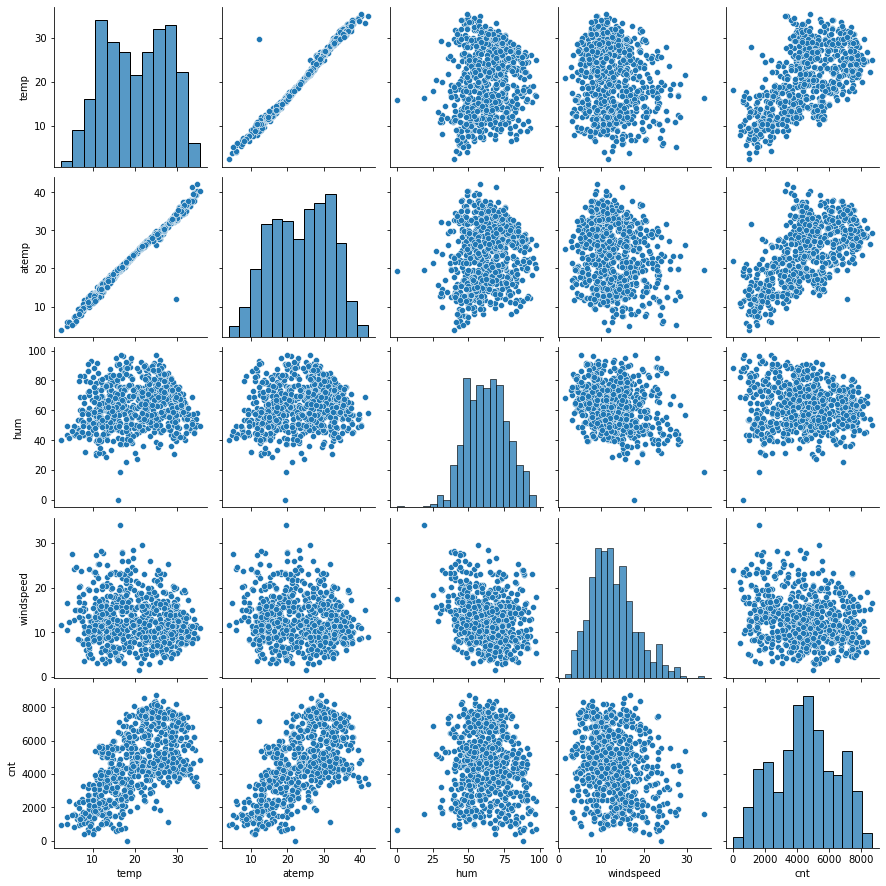

In [19]:
# Let's plot scatter plots for numerical features against our target variable 'cnt'
plt.figure(figsize = (18,30))
sns.pairplot(data=bikes, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

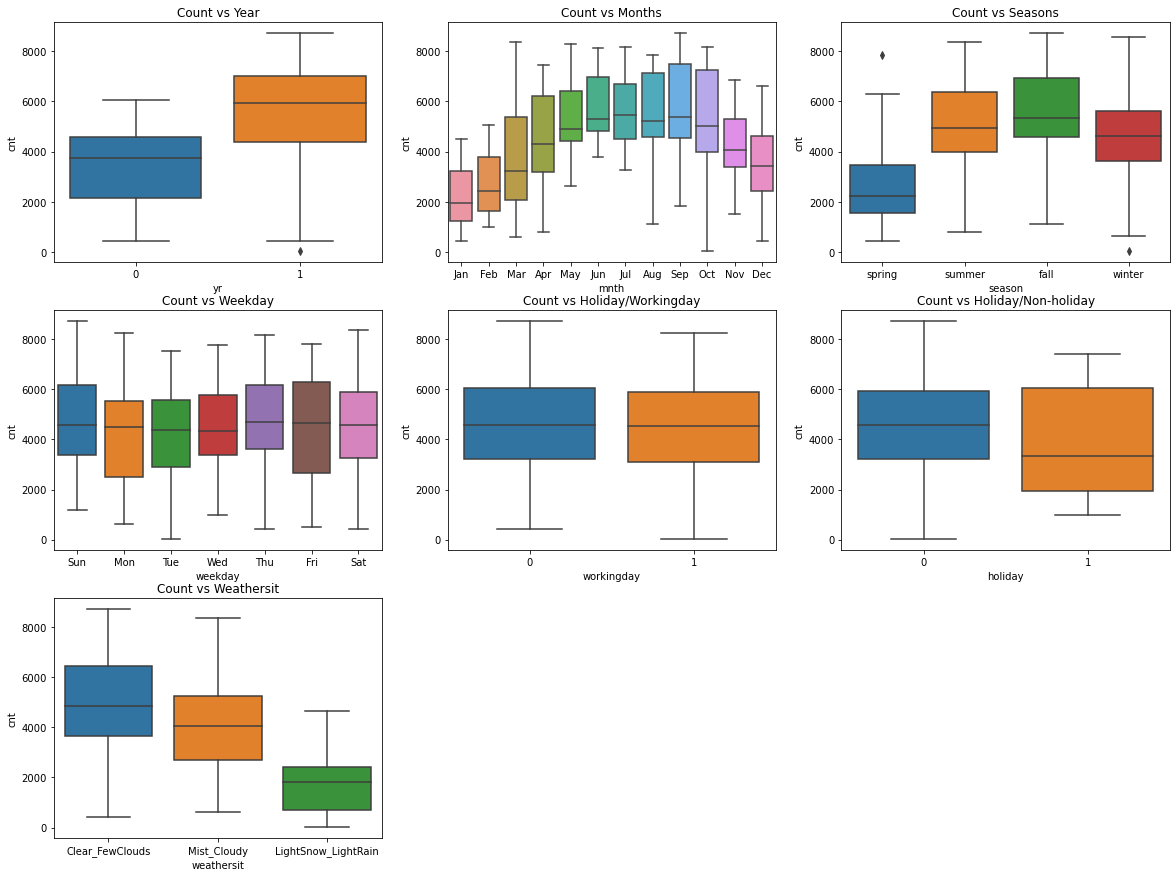

In [20]:
# Let's plot box plots for categorical features against our target variable 'cnt' using subplots
plt.figure(figsize=(20,15)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='yr',y='cnt',data=bikes).set_title('Count vs Year')


plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=bikes).set_title('Count vs Months')

plt.subplot(3,3,3)
sns.boxplot(x='season',y='cnt',data=bikes).set_title('Count vs Seasons')

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikes).set_title('Count vs Weekday')

plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikes).set_title('Count vs Holiday/Workingday')

plt.subplot(3,3,6)
sns.boxplot(x='holiday',y='cnt',data=bikes).set_title('Count vs Holiday/Non-holiday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikes).set_title('Count vs Weathersit')

plt.show()


<AxesSubplot:>

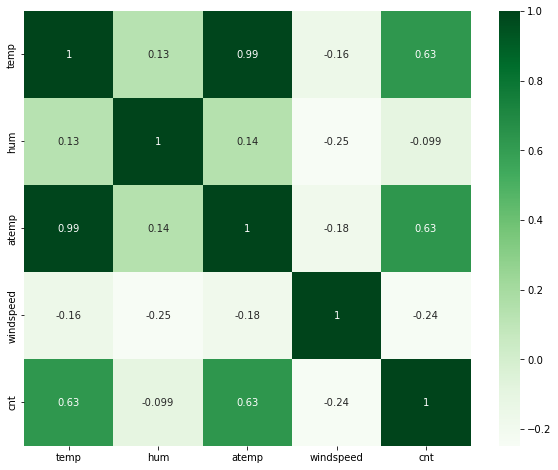

In [21]:
# Let's plot a heat map and see the correlation between features
plt.figure(figsize = (10,8))
sns.heatmap(bikes[['temp','hum','atemp','windspeed','cnt']].corr(), annot = True, cmap = 'Greens') 
#add atemp

### Insights:

##### From Scatter Plots:
- Looks like, temp and atemp columns are highly correlated to each other and with 'cnt' as well. 
##### From Box Plots:
- As we can see in 2019 the business was doing pretty well.
- During the month of September and October, in the fall season there were many rental bookings.
- Most of the booking were done when the weather was clear with few clouds.
- The number of bookings improve before weekends and during holidays the business hasn't done well.
##### From Heat Map:
- As we can see evidently, temp and atemp are strongly correlated, we can drop atemp.
- The feature 'Cnt' has linear relation with some of the features.

In [22]:
# Dropping atemp from the dataset
bikes.drop(['atemp'], axis=1, inplace=True)

## Data Preparation:

### Creating dummy variables for the categorical Columns - Month, Season, weekday and Weathersit

In [23]:
# We'll create a new data frame to store the dummies
dummy_variable = pd.get_dummies(bikes[['mnth','season','weekday','weathersit']],drop_first=True)

# Concat the dummy df with original df
bikes = pd.concat([bikes,dummy_variable], axis = 1)

# Drop Month, Season, Weekday and Weathersit columns
bikes.drop(['mnth','season','weekday','weathersit'], axis=1, inplace=True)
# Let's check the dataset if it shows reflections or not
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,mnth_Apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- If we have a categorical variable with (k) levels, we only need (k-1) levels in our dataset. 
- So by using 'drop_first= True' we are automatically dropping the first variable from all the (k) no of dummy variables, and bringing it down to (k-1).

In [24]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   mnth_Feb                        730 non-null    uint8   
 8   mnth_Mar                        730 non-null    uint8   
 9   mnth_Apr                        730 non-null    uint8   
 10  mnth_May                        730 non-null    uint8   
 11  mnth_Jun                        730 non-null    uint8   
 12  mnth_Jul              

- The columns - yr, holiday and working day are of datatype 'categorical' but have binary data 0 and 1. Solet's convert these data type to uint8

In [25]:
# Let's change the datatype pf categorical variables
bikes[['yr','holiday','workingday']] = bikes[['yr','holiday','workingday']].astype('uint8')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   mnth_Feb                        730 non-null    uint8  
 8   mnth_Mar                        730 non-null    uint8  
 9   mnth_Apr                        730 non-null    uint8  
 10  mnth_May                        730 non-null    uint8  
 11  mnth_Jun                        730 non-null    uint8  
 12  mnth_Jul                        730 

Now, our entire dataset is in numerical format. We can start with the splitting procedure.

## Splitting the data into Training and Testing dataset:

In [26]:
# Let's import sklearn and statmodel libraries for our all the future modelling needs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [27]:
# Now that we have imported all the libraries
# Let's split the data into two - Train and Test
bikes_train,bikes_test=train_test_split(bikes,train_size=0.7,random_state=100)
#Let's see their respective shape as well
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(220, 29)


#### We need to scale the variables before we start modelling
- As we know, the data in different columns of the data set are in various ranges.
- In order to build an efficient model (so that we can compare their VIF and P-value fairly) we need to keep them in the same range.

In [28]:
# Let's use MinMax Scaler to do so
# Creating one object to scale
scaler = MinMaxScaler()

#keeping numeric vars in a list
num_vars = ['temp','hum','windspeed','cnt']

#fit the data
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,mnth_Apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,1,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# let's verify if MinMaxScaler() has worked or not
bikes_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


 - As we can see, the minimum is zero and maximum is 1. The MinMaxScaler() has done its job.
 - MinMaxScaler() compresses the entire data in 0 to 1 range
 - Formula - (X-Xmin)/(Xmax-Xmin)

### Building and Training Linear Models

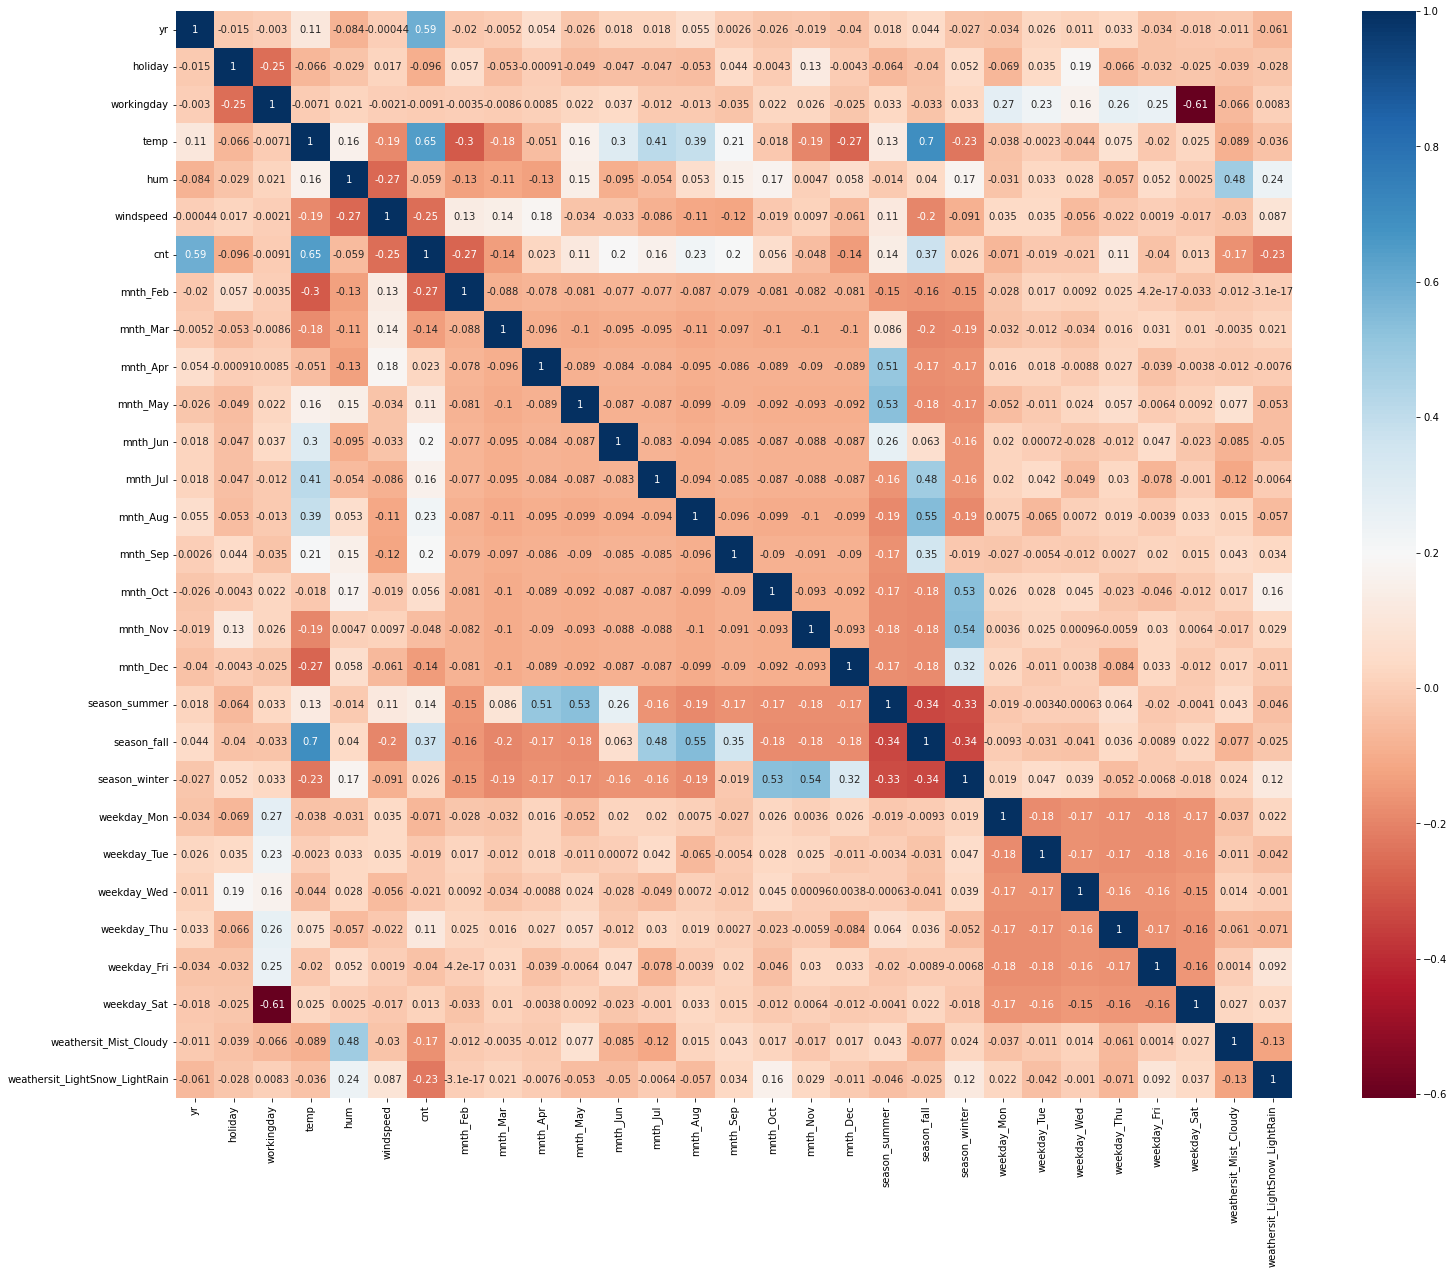

In [30]:
# Let's create another heatmap and see the correlation
plt.figure(figsize = (25,20))
sns.heatmap(bikes_train.corr(), annot = True, cmap = 'RdBu')
plt.show()

- We can see few features like temp, yr, season_fall and season_summer and a few others which has positive correlation with our target variable 'cnt'
- We shall use this heatmap for reference while building our model and confirm the feature correlation using VIF, p-value, R-squared etc.

### Let's start building Models

In [31]:
# Let's assign y_train and X_train
# assigned 'cnt' (target variable) to y_train
y_train = bikes_train.pop('cnt') 
# assigned rest of the features to X_train
X_train = bikes_train

In [32]:
# Creating an object for linear regression model
lr = LinearRegression()
# We shall fit our model now on Train data
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# We shall use RFE to only keep the most relevant features and cut down the number of columns from 29 to 15.
# Let's create an object for RFE as well
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)
#select the columns we want to work with
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Mar', 'mnth_May',
       'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]
# Let's see the 14 columns RFE discarded for us

Index(['workingday', 'mnth_Feb', 'mnth_Apr', 'mnth_Jun', 'mnth_Jul',
       'mnth_Nov', 'mnth_Dec', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed',
       'weekday_Thu', 'weekday_Fri', 'weekday_Sat'],
      dtype='object')

### Building a medel using StatsModel, for the detailed statistical summary

In [35]:
# Creating a dataset with the 15 columns
X_train_rfe = X_train[col]

In [36]:
# We have already imported statsmodel , we need to add a constant now 
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Let's create and run the 1st linear model
lm_1 = sm.OLS(y_train, X_train_rfe).fit()

In [65]:
# Creating a Function to calculate VIF
# We can call this function directly when we need to calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [66]:
# Now, let's see the statistical summary of our model
print(lm_1.summary())
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.00e-188
Time:                        19:21:06   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

##### Inference:
- P-value is high for the column mnth_May with 0.115.
- Let's drop mnth_May column first and see if that improves anything for us.

In [56]:
# dropping the column and adding constant to new dataset
X_train_new = X_train_rfe.drop(['mnth_May'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)

In [67]:
#Let's run the linear model again and see the summary
lm_2 = sm.OLS(y_train, X_train_lm).fit()
print(lm_2.summary())
vif_calc(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.46e-189
Time:                        19:21:34   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,46.85
11,season_fall,6.29
3,temp,3.72
10,season_summer,2.66
12,season_winter,2.33
4,hum,1.90
7,mnth_Aug,1.68
13,weathersit_Mist_Cloudy,1.56
9,mnth_Oct,1.51
8,mnth_Sep,1.40


##### Inference:
- Let's drop 'mnth_mar' as it has p-value more than 0.05
- After that, we can create the model again and see the new summary 

In [68]:
# dropping the column and adding constant to new dataset
X_train_one = X_train_lm.drop(['mnth_Mar'], axis = 1)
X_train_lm1 = sm.add_constant(X_train_one)

In [69]:
#Let's run the linear model again and see the summary
lm_3 = sm.OLS(y_train, X_train_lm1).fit()
print(lm_3.summary())
vif_calc(X_train_one)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.07e-189
Time:                        19:22:27   Log-Likelihood:                 510.77
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,45.90
10,season_fall,6.03
3,temp,3.70
9,season_summer,2.61
11,season_winter,2.16
4,hum,1.90
6,mnth_Aug,1.68
12,weathersit_Mist_Cloudy,1.56
8,mnth_Oct,1.51
7,mnth_Sep,1.40


##### Inference:
- Let's drop 'season_fall' column as the p-value for this column is increasing.
- Now the value is 0.221 , also, the VIF is 6.03 (which is higher than 5)

In [70]:
# dropping the column and adding constant to new dataset
X_train_two = X_train_lm1.drop(['season_fall'], axis = 1)
X_train_lm2 = sm.add_constant(X_train_two)
X_train_two.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'season_summer', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'],
      dtype='object')

In [71]:
#Let's run the linear model again and see the summary
lm_4 = sm.OLS(y_train, X_train_lm2).fit()
print(lm_4.summary())
vif_calc(X_train_two)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          1.49e-190
Time:                        19:23:04   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,45.88
4,hum,1.86
10,season_winter,1.71
3,temp,1.59
11,weathersit_Mist_Cloudy,1.55
8,mnth_Oct,1.48
6,mnth_Aug,1.45
9,season_summer,1.38
7,mnth_Sep,1.24
12,weathersit_LightSnow_LightRain,1.24


##### Inference:
- Now, that I have dropped 'season_fall' feature, the p-value for the rest of the features looking good except for 'mnth_Oct'.
- Let's drop that as well and see the summary and VIF for the new model

In [72]:
# dropping the column and adding constant to new dataset
X_train_three = X_train_lm2.drop(['mnth_Oct'], axis = 1)
X_train_lm3 = sm.add_constant(X_train_three)


In [73]:
#Let's run the linear model again and see the summary
lm_5 = sm.OLS(y_train, X_train_lm3).fit()
print(lm_5.summary())
vif_calc(X_train_three)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Sat, 07 May 2022   Prob (F-statistic):          7.50e-191
Time:                        19:23:52   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

,Features,VIF
0,const,45.17
4,hum,1.86
10,weathersit_Mist_Cloudy,1.55
3,temp,1.54
6,mnth_Aug,1.44
8,season_summer,1.37
9,season_winter,1.32
11,weathersit_LightSnow_LightRain,1.23
7,mnth_Sep,1.21
5,windspeed,1.18


##### Inference:
- Everything looks good now.
- VIF values are in good range
- P-values are significant
- Also, R-squared - 84.1% and Adjusted R-squared - 83.8%, which is pretty good.

In [48]:
#Let's look at the final model and it's features
model_final = lm_5

# list down and check variables of final model
final_var = list(model_final.params.index)
final_var.remove('const')
print('Final Selected Features Are:', final_var)

Final Selected Features Are: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Aug', 'mnth_Sep', 'season_summer', 'season_winter', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']


##### Final Selected Features Are: [ 'yr',  'holiday',  'temp',  'hum',  'windspeed',  'mnth_Aug',  'mnth_Sep',  'season_summer',   'season_winter',  'weathersit_Mist_Cloudy', ' weathersit_LightSnow_LightRain' ]

### Residual Analysis and Evaluation on Train Model:

In [51]:
# assigning the selected final_vars only
X_train_res = X_train[final_var]

In [53]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = model_final.predict(X_train_res)

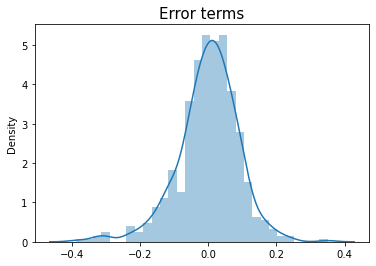

In [70]:
#Let's look at the distribution plot 
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms',fontsize=15)
plt.show()

### Insight:
- We can see the mean of the plot is around zero and it looks like a normal distribution

#### Model Evaluation using scatter plot:

Text(0, 0.5, 'Residual')

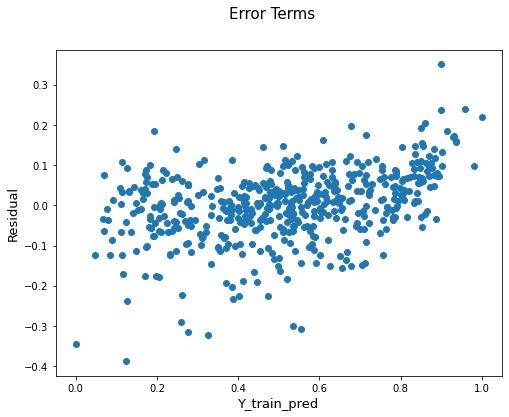

In [69]:
fig = plt.figure(figsize=(8,6))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=15)            
plt.xlabel('Y_train_pred', fontsize=13)
plt.ylabel('Residual', fontsize=13)  

#### Insight:
- The error terms, looks like, to be having constant variance which is also known as homoscedasticity.


###  Prediction on test set:
- Before starting with the procedure, we need to scale the test data
- Assign target variable to y_test and rest to X_test

In [56]:
#Scaling of Test data
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Feb,mnth_Mar,mnth_Apr,...,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,1,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,1,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# Let's assign y_test and X_test
# assigned 'cnt' (target variable) to y_train
y_test = bikes_test.pop('cnt') 
# assigned rest of the features to X_train
X_test = bikes_test

In [59]:
# We'll pnly use the final variable list to perform the test
X_test_sm = X_test[final_var]
X_test_sm.head()

,yr,holiday,temp,hum,windspeed,mnth_Aug,mnth_Sep,season_summer,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,1,0.831783,0.657364,0.084219,0,0,0,0,1,0
535,1,0,0.901354,0.610133,0.153728,0,0,1,0,0,0
299,0,0,0.511964,0.837699,0.334206,0,0,0,1,1,0
221,0,0,0.881625,0.437098,0.339570,1,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0,0,1,0,0,0


In [60]:
# adding coefficient constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,mnth_Aug,mnth_Sep,season_summer,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,1,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,0,1,1,0
221,1.0,0,0,0.881625,0.437098,0.339570,1,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,1,0,0,0


In [61]:
# Now, let's predict the test dataset
y_test_pred = model_final.predict(X_test_sm)

### Evaluation of model on Test Dataset:
- We shall check:
      - r-squared value
      - Adjusted r-squared value
      - Mean squared error
      - Plot the Error terms distribution plot
      - Error terms on scatter plot 

In [62]:
# R-squared test on y_test
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared value for Test dataset: ', round(r2_test,3))

R-Squared value for Test dataset:  0.805


In [64]:
# Adj. R-Squared for test dataset
#sample size of data
N= len(X_test) 
# Number of independent variable
p =len(final_var)
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared value for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared value for Test dataset:  0.795


In [65]:
# Mean Sqare Error for test dataset
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error value is :' ,round(mse,4))

Mean_Squared_Error value is : 0.0093


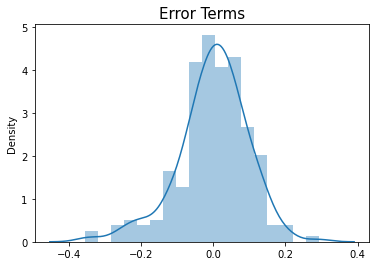

In [67]:
# destribution plot on error terms
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=15) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

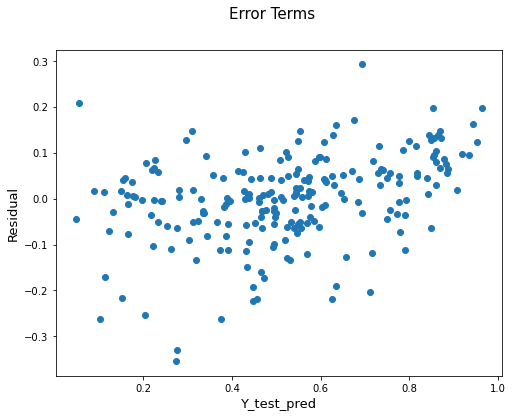

In [68]:
# scatter plot on Error terms
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=15) 
plt.xlabel('Y_test_pred', fontsize=13)
plt.ylabel('Residual', fontsize=13)   

#### Insights from above:
- R-squared value we got in train data was 84%. Here, R-squared value 80.5%. We can say model is working pretty decently. 
- Adj. R-squared value we got in train data was around 83% . Here, Adjusted R-squared value is 79.5%.
- We can clearly see the mean centering on zero here.
- We can say that the corresponding residual plot is reasonably random.

## y_test Vs y_pred:
 - Let's understand the spread among y_test and y_spread

Text(0, 0.5, 'y_test_pred')

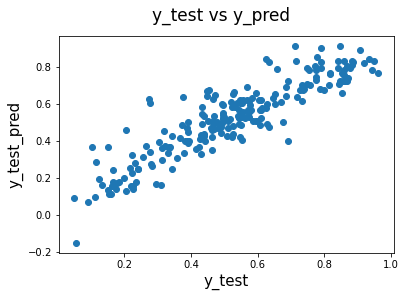

In [71]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 17)               
plt.xlabel('y_test', fontsize = 15)                         
plt.ylabel('y_test_pred', fontsize = 15)    

#### Insight:
- We can confidently say that our model lm_5 has quite good predictive capacity.

## Conclusion:

In [72]:
# Let's print and look at the R-squared, Adj. R-squared values for both train and test data.
# Also, let's have a look at the final co-efficient list

#  R Squared and adj. R Squared
print('R- Sqaured train: ', round(model_final.rsquared,2), '  Adj. R-Squared train:', round(model_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(model_final.params,3))

R- Sqaured train:  0.84   Adj. R-Squared train: 0.838
R- Sqaured test :  0.81   Adj. R-Squared test : 0.795

Coefficent for the variables are:
const                             0.232
yr                                0.229
holiday                          -0.095
temp                              0.540
hum                              -0.178
windspeed                        -0.184
mnth_Aug                          0.055
mnth_Sep                          0.122
season_summer                     0.104
season_winter                     0.147
weathersit_Mist_Cloudy           -0.053
weathersit_LightSnow_LightRain   -0.234
dtype: float64


## The Equation For Our Best Fitted Line is:

cnt = 0.232+(0.229×yr)-(0.095×holiday)+(0.540×temp)−(0.178×hum)-(0.184×windspeed)+(0.055×mnth_Aug)+(0.122×mnth_Sep)+(0.104×season_summer)+(0.147×season_winter)−(0.053×weathersit_Mist_Cloudy)-(0.234×weathersit_LightSnow_LightRain)

## Final Insights and Recommendations:
- From both R-Sqaured and Adjusted R-Sqaured value of train and test dataset respectively, we could conclude that the above features can efficiently explain around 80% of bike sharing demand.

- Coeffiencients of these variables explains their impact the bike demand.

- Based on the final model top three features contributing significantly towards explaining the demand are: Temperature, year, and mnth_sep.

- So it advisable to prioritize these variables while planning to achieve maximum demand.